In [423]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

user_col = ['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J']
data = pd.read_table("abalone.data" , sep = ',', header = None, names = user_col)

In [424]:
data

,A,B,C,D,F,G,H,I,J
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [425]:
data['A'].unique()

array(['M', 'F', 'I'], dtype=object)

In [426]:
data['A'].value_counts()

M    1528
I    1342
F    1307
Name: A, dtype: int64

In [427]:
data.A = pd.Categorical(data.A).codes

In [428]:
data

,A,B,C,D,F,G,H,I,J
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [429]:
data['A'].value_counts()

2    1528
1    1342
0    1307
Name: A, dtype: int64

In [430]:
data = data.to_numpy()

In [431]:
data

array([[ 2.    ,  0.455 ,  0.365 , ...,  0.101 ,  0.15  , 15.    ],
       [ 2.    ,  0.35  ,  0.265 , ...,  0.0485,  0.07  ,  7.    ],
       [ 0.    ,  0.53  ,  0.42  , ...,  0.1415,  0.21  ,  9.    ],
       ...,
       [ 2.    ,  0.6   ,  0.475 , ...,  0.2875,  0.308 ,  9.    ],
       [ 0.    ,  0.625 ,  0.485 , ...,  0.261 ,  0.296 , 10.    ],
       [ 2.    ,  0.71  ,  0.555 , ...,  0.3765,  0.495 , 12.    ]])

In [410]:
class EffficientkNNclassification:
    
    def __init__(self):
        
        np.random.seed(0)
        pass
        
    def normalise_data(self, X):
        
        min_max_scaler = preprocessing.MinMaxScaler()
        X_scaled = min_max_scaler.fit_transform(X)
        
        return X_scaled
    
    def forward_pass(self, X, W, rho1, rho2):
        
        a = np.sqrt((np.matmul(X, W) - X) **2)
        b = np.sum(np.absolute(W), axis = 1)
        L = csgraph.laplacian(X[:, 1]*X[:, 1][:, np.newaxis], normed=False)
        c = np.matmul(np.matmul(np.matmul(np.matmul(np.transpose(W), np.transpose(X)), L), X), W) 
        
        return a + (rho1 * b) + (rho2 * np.trace(c))
    
    def loss_fn(self, X, W):
        
        return np.sum(np.sqrt(np.matmul(X, W) ** 2)) / X.shape[1]
    
    def update_weights(self, W):
        
        return np.sqrt(W**2) / (2 * np.sqrt(np.absolute(W)))
    
    
    def fit(self, X, epochs = 1, rho1 = 1, rho2 = 1, display_loss = True):
        
        X = self.normalise_data(X)
        X = np.transpose(X)
        W = np.random.randn(X.shape[1], X.shape[1])
        loss = []
        
        for i in tqdm(range(epochs)):
            
            self.forward_pass(X, W, rho1, rho2)
            loss.append(self.loss_fn(X, W))
            W = np.absolute(W) - 0.1 *self.update_weights(W)
            
        if display_loss:
            plt.style.use('ggplot')
            plt.figure(figsize = (5,5))
            plt.plot(loss, '-o', markersize = 5)
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.show()

In [411]:
model = EffficientkNNclassification()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [07:07<00:00,  4.27s/it]


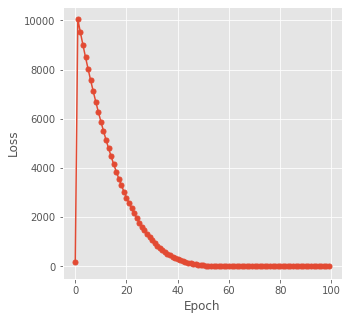

Wall time: 7min 9s


[181.06249513398285,
 10039.035507070532,
 9510.641482296542,
 8999.207374394844,
 8504.706899007791,
 8027.092657683079,
 7566.297610422173,
 7122.237108272136,
 6694.806545370109,
 6283.884016088416,
 5889.3289219640155,
 5510.982302885757,
 5148.6676643714645,
 4802.191059736937,
 4471.340433622197,
 4155.886841049263,
 3855.5832033231786,
 3570.1657814628124,
 3299.353171045531,
 3042.848120408597,
 2800.3374551447996,
 2571.491505417863,
 2355.96585172364,
 2153.3992852509537,
 1963.4183624608795,
 1785.6340425181497,
 1619.6463747099112,
 1465.0456853794249,
 1321.4114746304704,
 1188.3129366603894,
 1065.312536120315,
 951.9643887407559,
 847.8181728519548,
 752.4189189945276,
 665.3091798430444,
 586.032649451616,
 514.134267471106,
 449.1623514319923,
 390.66926771091664,
 338.21392750616286,
 291.3630062890165,
 249.69343210876593,
 212.79418388859804,
 180.2665857082016,
 151.72760016961618,
 126.81026469605382,
 105.16600712144783,
 86.46489070251053,
 70.39531544989849,
 5

In [435]:
%%time
model.fit(data, epochs = 100, rho1 = 0.2, rho2 = 0.2)